In [101]:
from scipy.io import arff # import arff files
import pandas as pd # data processing
import numpy as np # working with arrays
import matplotlib.pyplot as plt # visualization
from matplotlib import rcParams # figure size
import math as math # maths package
from statsmodels.stats.power import GofChisquarePower # sample sizing
from sklearn.preprocessing import LabelEncoder # wrangle strings to floats

In [ ]:
# importing training data
data = arff.loadarff('/content/training_subsetD.arff')
df = pd.DataFrame(data[0])
str_df = df.select_dtypes([np.object])
str_df = str_df.stack().str.decode('utf-8').unstack()
df = str_df
df.shape

In [ ]:
# importing test data
data = arff.loadarff('/content/testingD.arff')
dftest = pd.DataFrame(data[0])
str_dftest = dftest.select_dtypes([np.object])
str_dftest = str_dftest.stack().str.decode('utf-8').unstack()
str_dftest.head()
dftest = str_dftest
dftest.shape

In [28]:
# characterize the response
train_targets = df["Class"]
num_yes = train_targets.value_counts()[1]
n = df.shape[0]
prob_yes = num_yes/n
mean = n*prob_yes
sd = math.sqrt(n*prob_yes*(1-prob_yes))

In [53]:
# merging data unique strings + merging these + return unique strings
dflist = np.ndarray.tolist(np.unique(df))
dftestlist = np.ndarray.tolist(np.unique(dftest))
onelist = dflist + dftestlist
len(np.unique(onelist))

844

In [54]:
# encode the unique strings for processing in scikit learn
le = LabelEncoder()
le.fit(onelist)
df = np.array([le.transform(i) for i in df.values])
dftest = np.array([le.transform(i) for i in dftest.values])

In [86]:
# import the DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier

# assign data labels
train_features = df[:,:-1]
test_features = dftest[:,:-1]
train_targets = df[:,-1]
test_targets = dftest[:,-1]

# decision tree function
def DT(trainingset_features, testset_features, trainingset_targets, testset_targets, sample_size):
    tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split = sample_size).fit(trainingset_features,trainingset_targets)
    #prediction = tree.predict(testset_features) # predict the classes of new, unseen data
    accuracy = tree.score(testset_features,testset_targets)*100 # check the accuracy
    return accuracy

In [ ]:
effects = np.array(range(3,13,1))/100
effects = effects.tolist()
effects

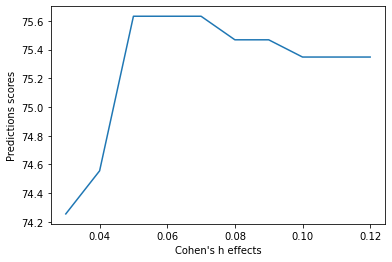

In [108]:
prediction_accuracies = []
sample_sizes = []
for i in effects :
  # parameters for power analysis
  effect = i
  alpha = 0.05
  power = 0.8
  # perform power analysis
  analysis = GofChisquarePower()
  sample_size = analysis.solve_power(effect_size=effect, power=power, nobs=None, alpha=alpha)
  sample_sizes.append(sample_size)
  accuracy = DT(train_features, test_features, train_targets, test_targets, i)
  prediction_accuracies.append(accuracy)
plt.plot(effects, prediction_accuracies)
plt.xlabel("Cohen's h effects")
plt.ylabel('Predictions scores')
plt.show()